instalando Tensorflow 2.0.

Guía del Código: https://medium.com/@joel_epping/entrenar-una-red-neuronal-para-la-clasificaci%C3%B3n-de-prendas-de-vestir-usando-tensorflow-2-0-eace7441be06

In [1]:
import tensorflow as tf
from tensorflow import keras
#Usaremos datetime para nombrar archivos
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO
# lo usaremos para reescalar imagen
import cv2
#verficamos la version de tensorflow tf 2.0
print(tf.__version__)

2.9.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y cuenta con otras 10.000 imágenes que sirven para evaluar la precisión de nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas, donde podemos encontrar abrigos, remeras, zapatillas, sandalias, entre otros.


In [3]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

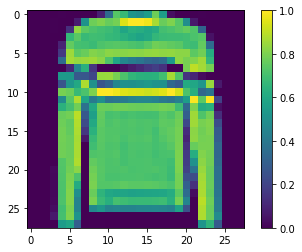

In [19]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

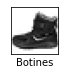

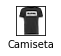

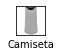

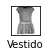

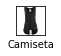

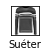

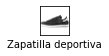

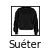

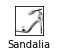

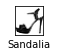

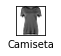

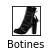

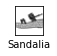

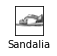

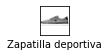

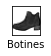

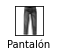

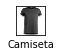

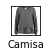

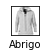

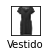

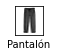

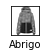

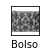

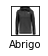

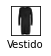

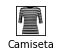

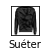

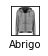

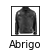

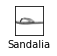

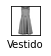

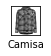

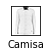

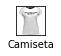

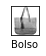

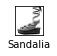

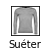

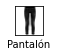

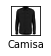

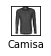

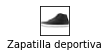

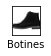

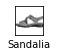

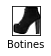

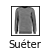

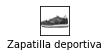

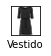

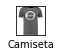

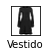

In [20]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

Re escalando las imágenes

In [9]:
train_images = train_images / 255
test_images = test_images / 255

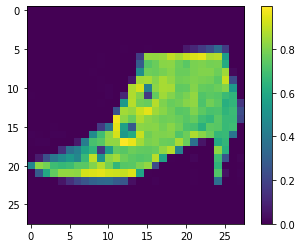

In [23]:
plt.figure()
plt.imshow(test_images[132])
plt.colorbar()
plt.grid(False)
plt.show()

Configurar la red Neuronal

In [24]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(150, activation=tf.nn.relu),
 keras.layers.Dense(10, activation=tf.nn.softmax)
])

Compilando el modelo

In [25]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics=['accuracy'])

Resumen de Modelo

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               117750    
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


 Es un resumen de como se encuentra configurada nuestra red neuronal, y como podemos ver, aquí se encuentran las 784 entrada de cada imágenes(28 por 28 px), las 150 neuronas asignadas, y las 10 posibles respuesta que podrá emitir nuestra red neuronal.

Entrenando la red

In [27]:
model.fit(train_images,
train_labels,
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4994 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3749 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3342 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3112 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2777 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2677 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2452 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.236

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8783
Test accuracy: 0.8783000111579895


Predicciones del Modelo

In [30]:
predictions = model.predict(test_images)
img_predict = predictions[20]

313/313 [==============================] - 2s 5ms/step


In [32]:
img_predict =predictions[20]
print(img_predict)

[1.8952191e-02 1.0775122e-03 9.6088004e-01 6.0510174e-05 1.3244630e-02
 1.2610368e-04 3.8577791e-03 5.9812196e-04 6.4084510e-04 5.6231726e-04]


In [33]:
np.argmax(img_predict) 

2

In [34]:
class_names[2]

'Suéter'

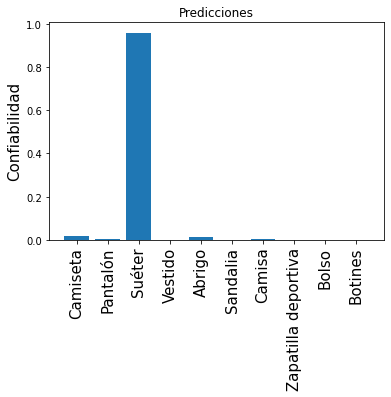

In [35]:
index = np.arange(len(class_names))
plt.bar(index, img_predict)
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

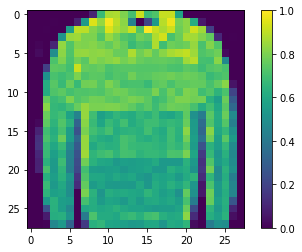

In [37]:
plt.figure()
plt.imshow(test_images[20])
plt.colorbar()
plt.grid(False)
plt.show()